<a href="https://colab.research.google.com/github/AnoshkinDV/Analysis-Data/blob/master/practical_case_of_ad_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Предобработка данных и разведывательный анализ**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [30]:
file_path = '/content/drive/MyDrive/Colab Notebooks/5_lesson_5_ads_data.zip'

In [133]:
ads_data = pd.read_csv(file_path,compression='zip')

In [38]:
ads_data

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29
...,...,...,...,...,...,...,...,...,...,...,...,...
3176709,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,android,199.4,239408,5467
3176710,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,android,199.4,239408,2508
3176711,112583,1554501092,click,2019-04-06,CPM,0,111818,112260,web,199.4,239408,7896
3176712,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,ios,199.4,239408,4319


In [34]:
1554076848

1554076848

In [35]:
'2019-04-01 15:23:25'

'2019-04-01 15:23:25'

In [134]:
ads_data['full_date'] = pd.to_datetime(ads_data.time,unit='s')
# ads_data.time – столбец time, который содержит временные метки (обычно в Unix-формате, т. е. количество секунд с 1 января 1970 года).
# pd.to_datetime(..., unit='s') – преобразует число секунд в объект datetime.


In [44]:
ads_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793,2019-04-01 00:00:48
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041,2019-04-01 16:24:26
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41,2019-04-01 16:24:26
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898,2019-04-01 16:24:26
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29,2019-04-01 16:24:26


In [45]:
ads_data.shape

(3176714, 13)

In [50]:
ads_data.dtypes

,0
ad_id,int64
time,int64
event,object
date,datetime64[ns]
ad_cost_type,object
has_video,int64
client_union_id,int64
campaign_union_id,int64
platform,object
ad_cost,float64


In [54]:
ads_data.full_date.dt.hour

,full_date
0,0
1,16
2,16
3,16
4,16
...,...
3176709,21
3176710,21
3176711,21
3176712,21


1Получить статистику по дням
Просто посчитать число всех событий по дням,число показов,число кликов,число уникальных объявлений и уникальных компаний.




- date – дата события
- time – время
- event – действие (просмотр/клик)
- platform – платформа ios,android
- ad_id – id объявления
- client_union_id – id рекламного кабинета, клиент,которому принадлежит объявление
- campaign_union_id – id рекламной кампании
- ad_cost_type – тип оплаты Оплата за клик или просмотр
- ad_cost – цена рекламного объявления
- has_video – есть ли видео
- target_audience_count – на какую аудиторию таргетировались объявления
- user id - пользователь которому показалась реклама


<Axes: xlabel='date'>

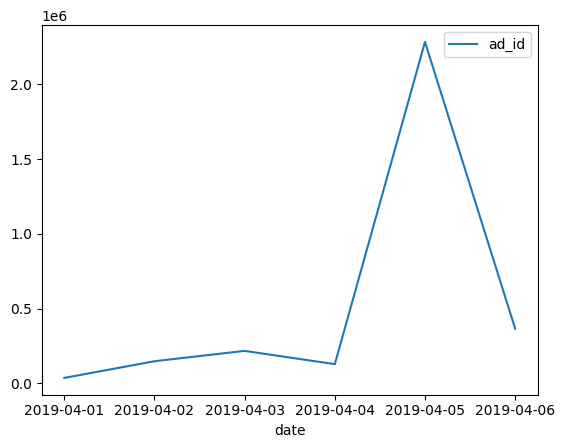

In [135]:
ads_data.groupby('date')\
        .agg({'ad_id':'count'}).plot() #число всех событий по дням

In [67]:
ads_data.query("event=='view'")\
        .groupby('date',as_index=False)\
        .aggregate(
            {'event':'count'}
        )\
        .rename(columns={'event':'count_view'}) #Число просмотров по дням

,date,count_view
0,2019-04-01,34832
1,2019-04-02,145811
2,2019-04-03,214851
3,2019-04-04,126182
4,2019-04-05,1783288
5,2019-04-06,284287


In [62]:
ads_data.query("event=='click'")\
        .groupby('date')\
        .aggregate(
            {'event':'count'}
        )\
        .rename(columns={'event':'count_click'}) #Число кликов по дням

,count_click
date,
2019-04-01,735
2019-04-02,1518
2019-04-03,1678
2019-04-04,1517
2019-04-05,501595
2019-04-06,80420


In [64]:
ads_data.groupby('event')\
        .agg({'ad_id':'count'}) #Суммарное количество кликов и просмотров

,ad_id
event,
click,587463
view,2589251


In [267]:
#Объединенное по дням количество кликов и показов
#pivot - это берем и изменяем структуру данных, мы хотим чтобы клики и просмотры стали колонками
ads_data.groupby(['date','event'],as_index=False)\
        .agg({'ad_id':'count'})\
        .pivot(index='date',columns='event',values='ad_id').reset_index()


event,date,click,view
0,2019-04-01,735,34832
1,2019-04-02,1518,145811
2,2019-04-03,1678,214851
3,2019-04-04,1517,126182
4,2019-04-05,501595,1783288
5,2019-04-06,80420,284287


In [72]:
#Посчитать количество уникальных объявлений и компаний по дням
ads_data.groupby('date',as_index=False)\
        .agg({'ad_id':'nunique'})

,date,ad_id
0,2019-04-01,49
1,2019-04-02,146
2,2019-04-03,179
3,2019-04-04,150
4,2019-04-05,131
5,2019-04-06,61


In [95]:
#Число уникальных объявлений по дням
ads_data.groupby('date',as_index=False)\
        .agg({'ad_id':'nunique'})

,date,ad_id
0,2019-04-01,49
1,2019-04-02,146
2,2019-04-03,179
3,2019-04-04,150
4,2019-04-05,131
5,2019-04-06,61


In [81]:
#Число уникальных компаний по дням
ads_data.groupby('date',as_index=False)\
        .agg({'campaign_union_id':'nunique'})

,date,campaign_union_id
0,2019-04-01,49
1,2019-04-02,146
2,2019-04-03,177
3,2019-04-04,147
4,2019-04-05,130
5,2019-04-06,60


In [82]:
#2Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявления или только у некоторых?
#Возникает много гипотез - 1. Особенный день
# 2.Пришел новый рекламодатель

In [136]:
ads_data.loc[ads_data.date=='2019-04-05']\
        .groupby('ad_id')\
        .agg({'time':'count'})\
        .sort_values('time',ascending=False)\
        .rename(columns={'time':'count_ad_id_for_day'})\
        .head()

,count_ad_id_for_day
ad_id,
112583,2166611
29927,27186
44635,8268
46583,7327
44956,5656


In [87]:
ad_id	= 112583

In [137]:
# ads_data[ads_data.ad_id==ad_id]
ads_data.query('ad_id==@ad_id')\
        .groupby('date')\
        .agg({'time':'count'})
#Делаем вывод что это объявление крутилось всего два дня

,time
date,
2019-04-05,2166611
2019-04-06,348613


In [138]:
ads_data.query('ad_id==@ad_id').head(1)
# То есть пришел клиент с айди 111818	, который предложил очень крутую рекламу, что сказалось на графиках

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
527124,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,web,199.4,239408,4355,2019-04-05 16:10:36


In [100]:
#Рассчитываем CTR - это качество рекламных объявлений
#CTR - ЧИСЛО КЛИКОВ/ЧИСЛО ПОКАЗОВ
#CPM
#Мы хотим чтобы по нашему объявлению больше кликали


In [142]:
ads_data_by_ad = ads_data.groupby(['ad_id','event'],as_index=False)\
        .agg({'time':'count'})\
        .pivot(index='ad_id',columns='event',values='time').reset_index()
ads_data_by_ad

event,ad_id,click,view
0,3,9.0,490.0
1,2132,1.0,95.0
2,2276,2.0,1454.0
3,2475,NaN,132.0
4,2643,3.0,286.0
...,...,...,...
350,121941,1.0,640.0
351,121943,15.0,1722.0
352,122042,1.0,155.0
353,122063,1.0,260.0


In [143]:
#Когда хотим получить несколько новых колонок путём вычисления существующих можно использовать assign
#Чтобы не делать создание колонок по одной ads_data['ctr'] = ads_data.click/ads_data.view
ads_data_by_ad = ads_data_by_ad.assign(ctr=ads_data_by_ad.click/ads_data_by_ad.view,
                           ctr_per=100*ads_data_by_ad.click/ads_data_by_ad.view)

In [144]:
ads_data_by_ad

event,ad_id,click,view,ctr,ctr_per
0,3,9.0,490.0,0.018367,1.836735
1,2132,1.0,95.0,0.010526,1.052632
2,2276,2.0,1454.0,0.001376,0.137552
3,2475,NaN,132.0,NaN,NaN
4,2643,3.0,286.0,0.010490,1.048951
...,...,...,...,...,...
350,121941,1.0,640.0,0.001563,0.156250
351,121943,15.0,1722.0,0.008711,0.871080
352,122042,1.0,155.0,0.006452,0.645161
353,122063,1.0,260.0,0.003846,0.384615


In [146]:
#Найдем топ-10 по ctr
ads_data_by_ad.sort_values('ctr',ascending=False).head(10)

event,ad_id,click,view,ctr,ctr_per
289,112583,580436.0,1934788.0,0.300000,29.999979
324,119450,258.0,1254.0,0.205742,20.574163
125,38575,43.0,257.0,0.167315,16.731518
144,40968,29.0,217.0,0.133641,13.364055
207,45642,42.0,344.0,0.122093,12.209302
283,110924,11.0,95.0,0.115789,11.578947
194,45043,28.0,245.0,0.114286,11.428571
96,35034,112.0,997.0,0.112337,11.233701
5,4585,53.0,476.0,0.111345,11.134454
328,120347,236.0,2168.0,0.108856,10.885609


In [147]:
#Отличается ли средний и медианный показатель CTR объявлений в наших данных
#Медианы отличаются в 2 раза
ads_data_by_ad.ctr.median()

0.010753240746688594

In [148]:
ads_data_by_ad.ctr.mean()

0.020628096080757954

<ipython-input-149-14f488cd1e6b>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ads_data_by_ad.ctr,kde=False)


<Axes: xlabel='ctr'>

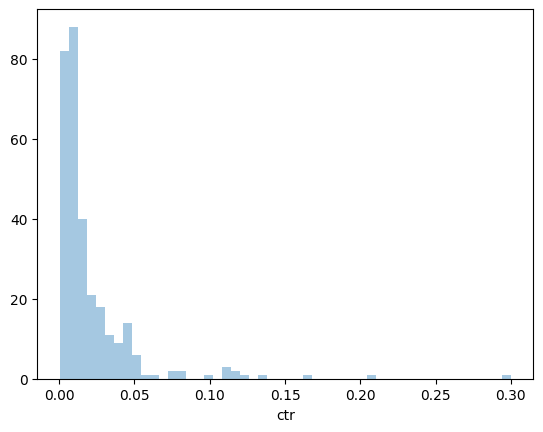

In [149]:
#Вызовем функцию, которая рисует распределение переменной и посмотреть как выглядит наш ctr
#kde=False - значит что это обычная гистограмма
#Довольно много объявлений с низким ctr, а с высоки ctr объявлений всё меньше и меньше
#Эти данные сложно охарактеризовать одним числом
#Среднее распределение зарплат по стране, тоже сложно описать, тк есть миллионеры, а есть очень бедные как и ctr
#Поэтому в таких случаях используют медианное значение. Например медианная зарплата в 100 тыс.р - означает что половина получает больше 100, половина меньше
#Часто используют её в статистике, тк она более разумная оценка.
import seaborn as sns
sns.distplot(ads_data_by_ad.ctr,kde=False)

**Ищем баги в аналитических логах**

In [126]:
# Похоже в наших логах есть баг: объявления приходят с кликами, но без показов !
# Сколько таких объявлений, есть ли какие-то закономерности ? Это проблема наблюдается на всех платформах?

# Поиск багов в аналитических логах - очень важная часть работы аналитика , он должен как никто другой понимать, что в данных что-то не так.
# Он должен понимать какие проверки сделать чтобы убедиться что всё нормально

In [151]:
#fillna(0) - заполняет NaN на 0
ads_data_by_ad = ads_data_by_ad.fillna(0)
ads_data_by_ad

event,ad_id,click,view,ctr,ctr_per
0,3,9.0,490.0,0.018367,1.836735
1,2132,1.0,95.0,0.010526,1.052632
2,2276,2.0,1454.0,0.001376,0.137552
3,2475,0.0,132.0,0.000000,0.000000
4,2643,3.0,286.0,0.010490,1.048951
...,...,...,...,...,...
350,121941,1.0,640.0,0.001563,0.156250
351,121943,15.0,1722.0,0.008711,0.871080
352,122042,1.0,155.0,0.006452,0.645161
353,122063,1.0,260.0,0.003846,0.384615


In [262]:
ads_data_by_ad .query('view==0')

event,ad_id,click,view,ctr,ctr_per
50,25665,14.0,0.0,0.0,0.0
77,30381,77.0,0.0,0.0,0.0
150,41424,2.0,0.0,0.0,0.0
161,42241,126.0,0.0,0.0,0.0
213,45866,21.0,0.0,0.0,0.0
219,46363,7.0,0.0,0.0,0.0
224,46544,14.0,0.0,0.0,0.0
294,113348,16.0,0.0,0.0,0.0
331,120444,9.0,0.0,0.0,0.0


In [263]:
ads_ids_bug = ads_data_by_ad .query('view==0').ad_id #Список id неправильных объявлений


In [264]:
ads_data[ads_data.ad_id.isin(ads_ids_bug)]\
        .groupby('platform',as_index=False)\
        .agg({'ad_id':'count'})\
        .sort_values('ad_id')
#Мы можем сказать что багованые события происходят чаще всего на android, но нам нужно понять, какое соотношение было исходно по платформам

,platform,ad_id
2,web,53
1,ios,92
0,android,141


In [265]:
ads_data\
        .groupby('platform',as_index=False)\
        .agg({'ad_id':'count'})\
        .sort_values('ad_id')
#Мы видим что изначально у нас на платформе андроид больше всего событий

,platform,ad_id
2,web,635425
1,ios,953078
0,android,1588211


**Процентили и медиана распределений**

In [161]:
# Есть ли различия в CTR у объявления с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04&

In [168]:
# ads_data_by_ad = ads_data_by_ad.assign(ctr=ads_data_by_ad.click/ads_data_by_ad.view,
#                            ctr_per=100*ads_data_by_ad.click/ads_data_by_ad.view)
df_2019_04_04 = ads_data.query("date=='2019-04-04'").groupby(['ad_id','event'],as_index=False)\
        .agg({'time':'count'})\
        .pivot(index='ad_id',columns='event',values='time').reset_index()

In [169]:
ads_data.query("date=='2019-04-04'").groupby(['ad_id','event'],as_index=False)\
        .agg({'time':'count'})\
        .pivot(index='ad_id',columns='event',values='time').reset_index()

event,ad_id,click,view
0,9071,3.0,352.0
1,9776,37.0,1115.0
2,10601,3.0,848.0
3,11887,151.0,8720.0
4,12137,1.0,170.0
...,...,...,...
145,120790,NaN,19.0
146,121779,68.0,1116.0
147,121790,7.0,701.0
148,121941,NaN,95.0


In [179]:
df_2019_04_04= df_2019_04_04.assign(ctr=df_2019_04_04.click/df_2019_04_04.view,
                     ctr_per=df_2019_04_04.click/df_2019_04_04.view*100).fillna(0)
#В таком случае не надо использовать df_2019_04_04[['ctr','ctr_per']]=...
#95 процентиль это то значение которое превышает 5 процентов наших наблюдений
#95 процентиль зарплаты равен 140 тыс - это означает что 95 процентов работников получает меньше 140 тыс.р. а 5 процентов больше

In [181]:
df_2019_04_04[df_2019_04_04.click>0].ctr #Рассматриваем ctr где click не равен 0

,ctr
0,0.008523
1,0.033184
2,0.003538
3,0.017317
4,0.005882
...,...
141,0.035714
143,0.023923
144,0.001065
146,0.060932


In [182]:
#df.quantile рассчитывает квантиль, в аргументах указываем какой(это тип флоат)
df_2019_04_04[df_2019_04_04.click>0].ctr.quantile(0.95)

0.10211538461538454

In [183]:
df_2019_04_04[df_2019_04_04.click>0].ctr.quantile() # 0.5 квантиль

0.012658227848101266

In [206]:
df_2019_04_04_with_video.assign(ctr=df_2019_04_04_with_video.click/df_2019_04_04_with_video.view,).fillna(0).query('ctr>0').ctr.quantile(0.95)

0.045454545454545456

In [197]:
df_2019_04_04_with_video = ads_data.query("date=='2019-04-04'and has_video==1").groupby(['ad_id','event'],as_index=False)\
        .agg({'time':'count'})\
        .pivot(index='ad_id',columns='event',values='time').reset_index()

In [202]:
df_2019_04_04_out_video = ads_data.query("date=='2019-04-04'and has_video==0").groupby(['ad_id','event'],as_index=False)\
        .agg({'time':'count'})\
        .pivot(index='ad_id',columns='event',values='time').reset_index()

In [205]:
df_2019_04_04_out_video.assign(ctr=df_2019_04_04_out_video.click/df_2019_04_04_out_video.view,).fillna(0).query('ctr>0').ctr.quantile(0.95)

0.10281249999999989

**Составные запросы при фильтрации**


In [ ]:
# Для финансового отчета нужно рассчитать наш заработок по дням.
# В какой день мы заработали больше всего? В какой меньше?

# Мы списываем с клиентов деньги, если произошел клик по CPC объявлению,
# и мы списываем деньги за каждый показ CPM объявления, если у
# CPM объявления цена - 200 рублей, то за один показ мы зарабатываем 200 / 1000.

# Какая платформа самая популярная для размещения рекламных объявлений?
# Сколько процентов показов приходится на каждую из платформ (колонка platform)?


In [ ]:
#Создаем колоночку которая показывает сколько стоит взятое событие если event=view, ad_cost_time = CPM, то цена будет ad_cost/1000
#Если выполняются два условия, прописанные ниже, то это сумма платных взаимодействий!

In [212]:
ads_data[(ads_data.ad_cost_type=='CPC') & (ads_data.event=='click')].ad_cost.sum()

,ad_cost
date,
2019-04-01,7036.9
2019-04-02,7663.7
2019-04-03,38597.2
2019-04-04,26878.0
2019-04-05,4381.2
2019-04-06,253.0


In [209]:
ads_data[(ads_data.ad_cost_type == 'CPM') &  (ads_data.event == 'view')].ad_cost.sum() / 1000

497090.6778000003

In [210]:
total_cost = (
    ads_data[(ads_data.ad_cost_type == 'CPC') & (ads_data.event == 'click')].ad_cost.sum() +
    ads_data[(ads_data.ad_cost_type == 'CPM') & (ads_data.event == 'view')].ad_cost.sum() / 1000
)
total_cost

581900.6778000003

In [213]:
ads_data[(ads_data.ad_cost_type == 'CPC') & (ads_data.event == 'click')]

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
248,4585,1554135960,click,2019-04-01,CPC,0,37,4382,android,53.5,327648,538,2019-04-01 16:26:00
880,120444,1554136218,click,2019-04-01,CPC,0,120413,120440,android,52.0,4667,874,2019-04-01 16:30:18
1011,38110,1554136457,click,2019-04-01,CPC,0,23359,38110,android,54.1,4181,239,2019-04-01 16:34:17
1569,38575,1554133580,click,2019-04-01,CPC,0,23533,38575,android,44.8,21831,1016,2019-04-01 15:46:20
1950,38575,1554134271,click,2019-04-01,CPC,0,23533,38575,ios,44.8,21831,980,2019-04-01 15:57:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919449,19940,1554507113,click,2019-04-06,CPC,0,2016,19939,android,54.9,24781,6614,2019-04-05 23:31:53
2951415,113878,1554506129,click,2019-04-06,CPC,0,113785,113878,ios,46.3,5473,8335,2019-04-05 23:15:29
2968612,26263,1554505928,click,2019-04-06,CPC,0,14710,26263,ios,47.0,10912,2382,2019-04-05 23:12:08
2991470,3,1554506714,click,2019-04-06,CPC,0,1,1,ios,52.4,52875,413,2019-04-05 23:25:14


In [ ]:
# Для финансового отчета нужно рассчитать наш заработок по дням.
# В какой день мы заработали больше всего? В какой меньше?

In [218]:
cpc_earnings = ads_data[(ads_data.ad_cost_type == 'CPC') & (ads_data.event == 'click')].groupby('date')['ad_cost'].sum()

In [219]:
cpm_earnings = ads_data[(ads_data.ad_cost_type == 'CPM') & (ads_data.event == 'view')].groupby('date')['ad_cost'].sum() / 1000


In [222]:
#Использовал метод add чтобы поэлементно сложить два ДатаФрейма,
#Здесь fill_value=0 гарантирует, что если для какого-то индекса в одном из объектов нет значения, то вместо NaN будет использоваться 0
earnings = cpc_earnings.add(cpm_earnings,fill_value=0)

<Axes: xlabel='date'>

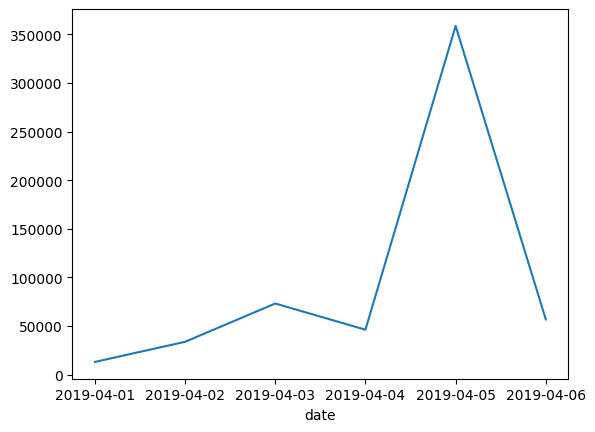

In [226]:
#Распределение по дням для суммарного заработка
earnings.plot()


In [227]:
# Какая платформа самая популярная для размещения рекламных объявлений?
# Сколько процентов показов приходится на каждую из платформ (колонка platform)?

In [231]:
ads_data.groupby('platform')\
        .agg({'ad_id':'count'}).idxmax()

,0
ad_id,android


In [241]:
ads_data.query("event=='view'")\
        .groupby('platform')\
        .agg({'ad_id':'count'})/len(ads_data)

,ad_id
platform,
android,0.407713
ios,0.244313
web,0.163045


In [242]:
# А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?
# Это уже на языке продуктовом, что сложно

In [252]:
ads_data.groupby(['ad_id','event'],as_index=False)\
        .agg({'time':
              'min'})\
        .pivot(index='ad_id',columns='event',values='time').reset_index()\
        .query('click < view')


event,ad_id,click,view
27,16548,1.554336e+09,1.554336e+09
81,30939,1.554165e+09,1.554173e+09
138,40464,1.554164e+09,1.554164e+09
158,42007,1.554423e+09,1.554423e+09
185,44543,1.554336e+09,1.554337e+09
201,45436,1.554336e+09,1.554336e+09
324,119450,1.554336e+09,1.554336e+09


In [257]:
  ads_data[ads_data.ad_id==16548].sort_values('time')
  #Объявление с багом это 16548, где сначала идёт click потом view - это баг!

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
512690,16548,1554336083,click,2019-04-04,CPM,0,722,16523,ios,196.6,53199,4133,2019-04-04 00:01:23
511482,16548,1554336278,view,2019-04-04,CPM,0,722,16523,android,196.6,53199,3736,2019-04-04 00:04:38
511439,16548,1554336352,view,2019-04-04,CPM,0,722,16523,android,196.6,53199,4968,2019-04-04 00:05:52
511438,16548,1554336352,view,2019-04-04,CPM,0,722,16523,ios,196.6,53199,4206,2019-04-04 00:05:52
511437,16548,1554336352,view,2019-04-04,CPM,0,722,16523,web,196.6,53199,3898,2019-04-04 00:05:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056433,16548,1554422265,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,3613,2019-04-04 23:57:45
2056432,16548,1554422265,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,6044,2019-04-04 23:57:45
2056461,16548,1554422308,view,2019-04-05,CPM,0,722,16523,ios,196.6,53199,5831,2019-04-04 23:58:28
2056652,16548,1554422338,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,2837,2019-04-04 23:58:58
